<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Define start day to fetch the dataset from the yahoo finance library

---



In [ ]:
START = "2010-01-01"
TODAY = "2024-05-01"

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('^GSPC')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1116.560059,1133.869995,1116.560059,1132.989990,3991400000
1,1132.660034,1136.630005,1129.660034,1136.520020,2491020000
2,1135.709961,1139.189941,1133.949951,1137.140015,4972660000
3,1136.270020,1142.459961,1131.319946,1141.689941,5270680000
4,1140.520020,1145.390015,1136.219971,1144.979980,4389590000


Visualizing Closing Price

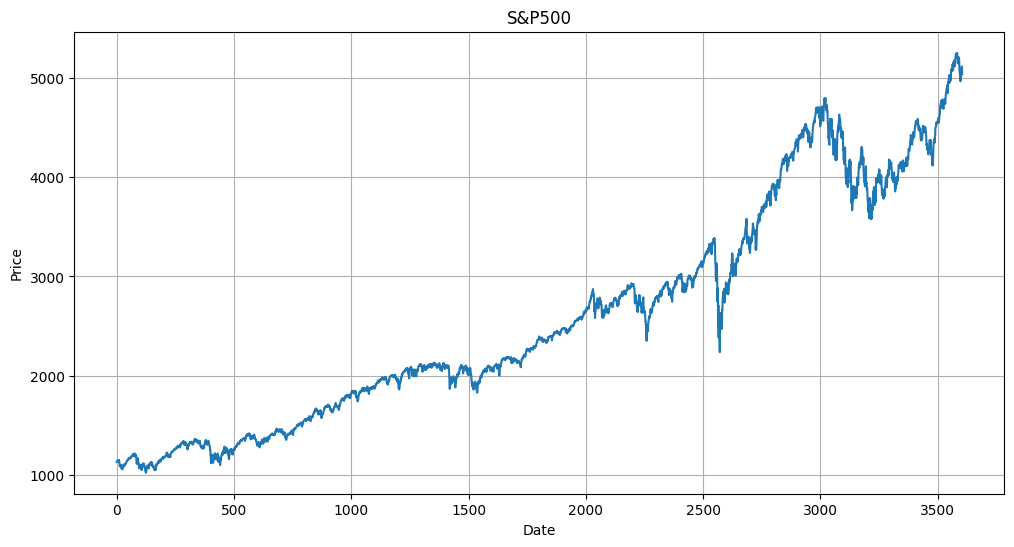

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("S&P500")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [ ]:
df

,Open,High,Low,Close,Volume
0,1116.560059,1133.869995,1116.560059,1132.989990,3991400000
1,1132.660034,1136.630005,1129.660034,1136.520020,2491020000
2,1135.709961,1139.189941,1133.949951,1137.140015,4972660000
3,1136.270020,1142.459961,1131.319946,1141.689941,5270680000
4,1140.520020,1145.390015,1136.219971,1144.979980,4389590000
...,...,...,...,...,...
3600,5084.859863,5089.479980,5047.020020,5071.629883,3656740000
3601,5019.879883,5057.750000,4990.580078,5048.419922,3958050000
3602,5084.649902,5114.620117,5073.140137,5099.959961,3604140000
3603,5114.129883,5123.490234,5088.649902,5116.169922,3447450000


# Plotting moving averages of 100 day

---



In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3600    4949.884302
3601    4954.690503
3602    4959.743804
3603    4965.207705
3604    4969.892803
Name: Close, Length: 3605, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

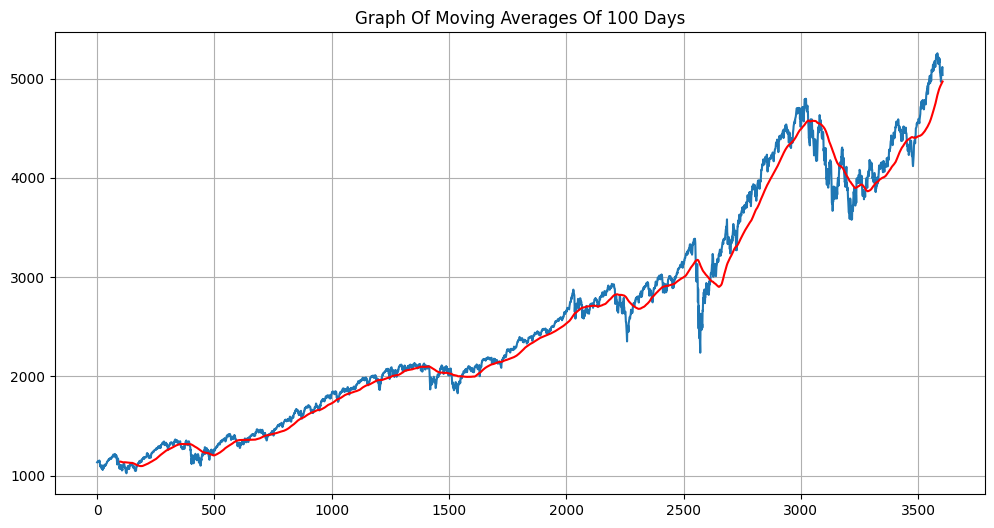

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3600    4683.744802
3601    4686.790603
3602    4689.929602
3603    4692.960251
3604    4695.611602
Name: Close, Length: 3605, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

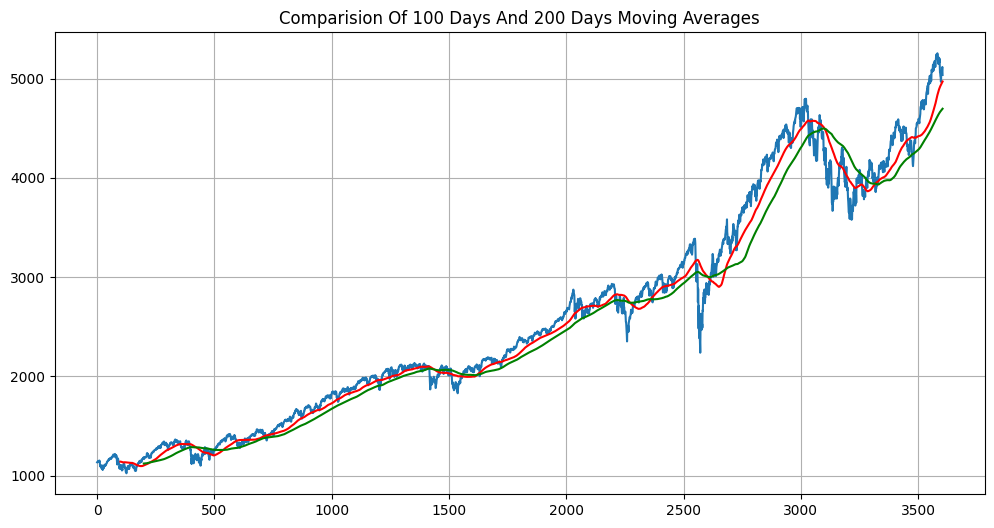

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(3605, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.7)])
test = pd.DataFrame(data[int(len(data)*0.7): int(len(data))])

print(train.shape)
print(test.shape)

(2523, 7)
(1082, 7)


In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [ ]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2523,2020-01-13,3271.129883,3288.129883,3268.429932,3288.129883,3288.129883,3459390000
2524,2020-01-14,3285.350098,3294.250000,3277.189941,3283.149902,3283.149902,3687620000
2525,2020-01-15,3282.270020,3298.659912,3280.689941,3289.290039,3289.290039,3721490000
2526,2020-01-16,3302.969971,3317.110107,3302.820068,3316.810059,3316.810059,3540580000
2527,2020-01-17,3323.659912,3329.879883,3318.860107,3329.620117,3329.620117,3726220000


# Using MinMax scaler for normalization of the dataset

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.04902491],
       [0.05059233],
       [0.05086763],
       ...,
       [0.99038688],
       [1.        ],
       [0.99584842]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2423, 100, 1)

# ML Model (LSTM)

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

# Training the model

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
76/76 [==============================] - 34s 294ms/step - loss: 0.0311 - mean_absolute_error: 0.1196
Epoch 2/100
76/76 [==============================] - 21s 275ms/step - loss: 0.0072 - mean_absolute_error: 0.0602
Epoch 3/100
76/76 [==============================] - 22s 293ms/step - loss: 0.0064 - mean_absolute_error: 0.0569
Epoch 4/100
76/76 [==============================] - 22s 297ms/step - loss: 0.0059 - mean_absolute_error: 0.0544
Epoch 5/100
76/76 [==============================] - 21s 278ms/step - loss: 0.0063 - mean_absolute_error: 0.0562
Epoch 6/100
76/76 [==============================] - 23s 297ms/step - loss: 0.0054 - mean_absolute_error: 0.0513
Epoch 7/100
76/76 [==============================] - 21s 274ms/step - loss: 0.0043 - mean_absolute_error: 0.0467
Epoch 8/100
76/76 [==============================] - 22s 293ms/step - loss: 0.0045 - mean_absolute_error: 0.0479
Epoch 9/100
76/76 [==============================] - 22s 292ms/step - loss: 0.0055 - mean_absolu

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_close.shape

(1082, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
past_100_days

,0
0,2900.510010
1,2924.429932
2,2922.949951
3,2847.110107
4,2878.379883
...,...
95,3246.280029
96,3237.179932
97,3253.050049
98,3274.699951


In [ ]:
test_df

,0
0,3288.129883
1,3283.149902
2,3289.290039
3,3316.810059
4,3329.620117
...,...
1077,5071.629883
1078,5048.419922
1079,5099.959961
1080,5116.169922


In [ ]:
prueba = pd.concat([past_100_days,test_df])
prueba

,0
0,2900.510010
1,2924.429932
2,2922.949951
3,2847.110107
4,2878.379883
...,...
1077,5071.629883
1078,5048.419922
1079,5099.959961
1080,5116.169922


**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
final_df = pd.concat([past_100_days,test_df],ignore_index = True)

In [ ]:
final_df.head()

,0
0,2900.510010
1,2924.429932
2,2922.949951
3,2847.110107
4,2878.379883


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.21979485],
       [0.22772336],
       [0.2272328 ],
       ...,
       [0.94882576],
       [0.95419872],
       [0.92752278]])

In [ ]:
input_data.shape

(1182, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1082, 100, 1)
(1082,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

34/34 [==============================] - 4s 91ms/step


In [ ]:
y_pred.shape

(1082, 1)

In [ ]:
y_test

array([0.34827555, 0.34662488, 0.34866009, ..., 0.94882576, 0.95419872,
       0.92752278])

In [ ]:
y_pred

array([[0.36812347],
       [0.36887008],
       [0.3696118 ],
       ...,
       [0.8233112 ],
       [0.8248916 ],
       [0.82785857]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00033146])

In [ ]:
scale_factor = 1/scaler.scale_
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

In [ ]:
df_precios = pd.DataFrame()
df_precios["Real/Test"] = y_test
df_precios["Pred"] = y_pred

df_precios.to_csv("Precios S&P500.csv", index = False)

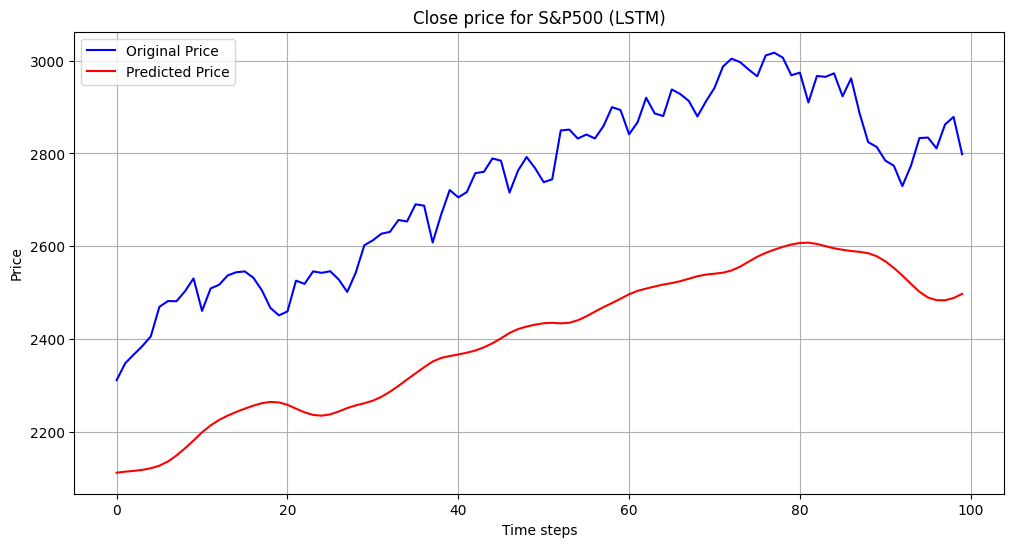

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test[982:1082], 'b', label = "Original Price")
plt.plot(y_pred[982:1082], 'r', label = "Predicted Price")
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.legend()
plt.title("Close price for S&P500 (LSTM)")
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))


def calc_mape(predicted_data, true_data):
    return np.mean(np.abs((true_data - predicted_data) / true_data)) * 100

y_test_0 = y_test
y_test_0[48] = 1000

mape = calc_mape(y_pred, y_test)
print("Mean absolute percentage error on test set: {:.2f}%".format(mape))

Mean absolute error on test set: 8.75%
Mean absolute percentage error on test set: 47.36%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8857221732722472


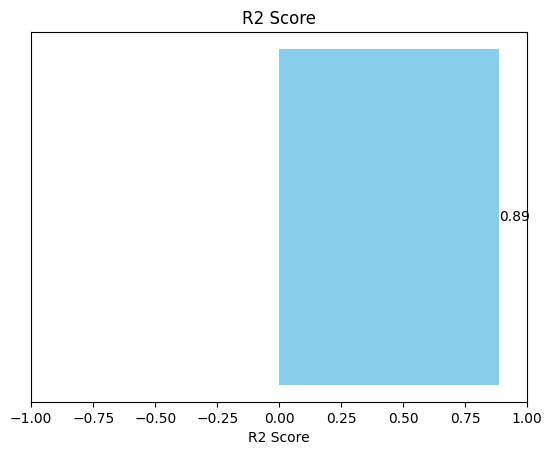

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

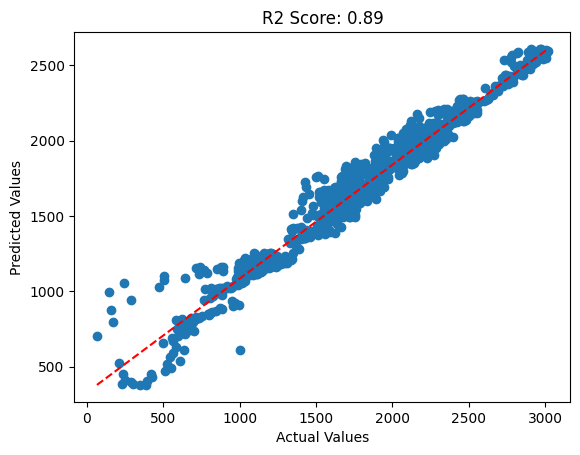

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

# Movimiento del Precio

In [ ]:
testeo = []
signal = []
for i in range(1,len(actual)):
  if actual[i] > actual[i-1]:
    testeo.append(1)
  else:
    testeo.append(-1)
for i in range(1,len(predicted)):
  if predicted[i] > predicted[i-1]:
    signal.append(1)
  else:
    signal.append(-1)

In [ ]:
accuracy_score(testeo,signal)

0.5189639222941721

In [ ]:
fpr, tpr, thresholds = roc_curve(testeo, signal)

Text(0, 0.5, 'True Positive Rate')

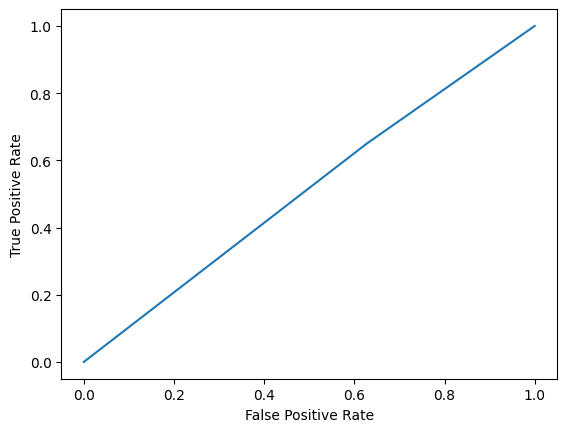

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
roc_auc_score(testeo, signal)

0.5111431612925381

In [ ]:
confusion_matrix(testeo, signal)

array([[190, 320],
       [200, 371]])

In [ ]:
df_movimiento = pd.DataFrame()
df_movimiento["test"] = testeo
df_movimiento["signal"] = signal
df_movimiento

,test,signal
0,-1,1
1,1,1
2,1,1
3,1,1
4,-1,1
...,...,...
1076,1,-1
1077,-1,-1
1078,1,-1
1079,1,1


In [ ]:
df_movimiento.to_csv('LSTM_Movimiento.csv',index=False)

In [ ]:
df_100

982     1
983     1
984     1
985     1
986     1
       ..
1076   -1
1077   -1
1078   -1
1079    1
1080    1
Name: signal, Length: 99, dtype: int64

In [ ]:
equity_df = pd.DataFrame()
equity = [100]

TP = 0.03
SL = 0.01

pos = 0
price = 0

actual_100 = actual[982:1082]
df_100 = df_movimiento["signal"][982:1082]


for i in range(1,len(actual_100)):

  equity.append(equity[i-1])

  if pos == 1:
    if actual_100[i] >= price*(1+TP):
      pos = 0
      equity[i] *= (1+TP)

    elif actual_100[i] <= price*(1-SL):
      pos = 0
      equity[i] *=(1-SL)

  elif pos == -1:

    if actual_100[i] <= price*(1-TP):
      pos = 0
      equity[i] *= (1+TP)

    elif actual_100[i] >= price*(1+SL):
      pos = 0
      equity[i] *=(1-SL)

  else:

    if df_100[i+981] !=0:
      pos = df_100[i+981]
      price = actual_100[i]

equity_df["Equity"] = equity

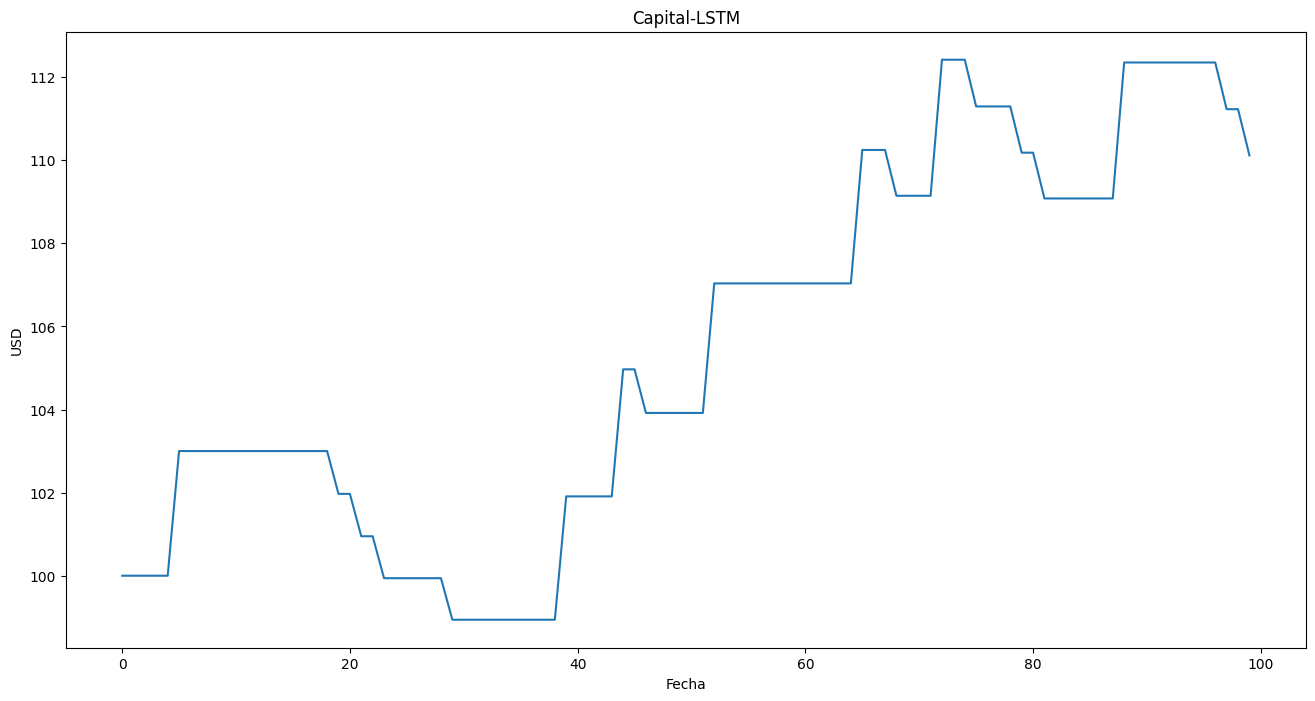

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(equity_df["Equity"])
plt.title("Capital-LSTM")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.show()

In [ ]:
ret_LSTM =np.log(equity_df["Equity"]).diff().mean()
ret_LSTM *= 252
vol_LSTM =np.log(equity_df["Equity"]).diff().std()
vol_LSTM *= np.sqrt(252)
vol_LSTM

0.1354361994357373

In [ ]:
rf =  0.052
sharpe_ratio = (ret_LSTM-rf)/vol_LSTM
sharpe_ratio

1.4270535467970116

In [ ]:
equity_df

,Equity
0,100.000000
1,100.000000
2,100.000000
3,100.000000
4,100.000000
...,...
95,112.351099
96,112.351099
97,111.227588
98,111.227588
